Here we will study each of the systems separately

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
data2 = pd.ExcelFile('ModifiedData/Cu_sys_intro.xlsx')
print(data2.sheet_names)
df3 = data2.parse('Sheet1')
df3.head(5)

df4 = df3.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df4.dropna()
pd.options.display.max_rows = 999
df4.info()
df4.head(5)

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
X              72 non-null int64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


,Dinv,LnFeDomains,LnDinv,X
0,2.325581,-0.063935,0.843970,1
1,3.125000,-0.171537,1.139434,1
2,3.030303,-0.297457,1.108663,1
3,3.030303,-0.565593,1.108663,1
4,4.166667,-0.818951,1.427116,1


In [3]:
FNS = df4[(df4['X']==1)]
FNP = df4[(df4['X']==2)]
FNC = df4[(df4['X']==3)]
FNSi = df4[(df4['X']==4)]
FNSP = df4[(df4['X']==5)]
FSC = df4[(df4['X']==6)]

Separating all the systems >> Now we can see that FeNiC, and FeNiP show different trend from the FiNiS systems

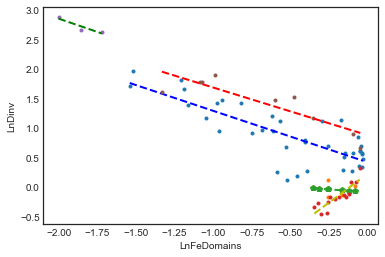

In [4]:
# SULPHUR
fit = np.polyfit(FNS['LnFeDomains'],FNS['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNS['LnFeDomains'],FNS['LnDinv'], '.', np.sort(FNS['LnFeDomains']), fit_fn(np.sort(FNS['LnFeDomains'])), '--b', linewidth=2)

# PHOSPHORUS
fit = np.polyfit(FNP['LnFeDomains'],FNP['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNP['LnFeDomains'],FNP['LnDinv'], '.', np.sort(FNP['LnFeDomains']), fit_fn(np.sort(FNP['LnFeDomains'])), '--p', linewidth=2)

# CARBON
fit = np.polyfit(FNC['LnFeDomains'],FNC['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNC['LnFeDomains'],FNC['LnDinv'], '.', np.sort(FNC['LnFeDomains']), fit_fn(np.sort(FNC['LnFeDomains'])), '--y', linewidth=2)

# S&P
fit = np.polyfit(FNSP['LnFeDomains'],FNSP['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNSP['LnFeDomains'],FNSP['LnDinv'], '.', np.sort(FNSP['LnFeDomains']), fit_fn(np.sort(FNSP['LnFeDomains'])), '--g', linewidth=2)

# Fe-S-C
fit = np.polyfit(FSC['LnFeDomains'],FSC['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FSC['LnFeDomains'],FSC['LnDinv'], '.', np.sort(FSC['LnFeDomains']), fit_fn(np.sort(FSC['LnFeDomains'])), '--r', linewidth=2)


plt.xlabel("LnFeDomains")
plt.ylabel("LnDinv")
plt.show()

Clearly we can see that, different systems have different values of fractionation constant for same value of FeDomains.

#### MULTIPLE LINEAR REGRESSION

In [5]:
df4.tail(5)

,Dinv,LnFeDomains,LnDinv,X
67,4.545455,-0.480008,1.514128,6
68,2.439024,-0.092811,0.891598,6
69,1.923077,-0.047822,0.653926,6
70,5.000000,-1.332359,1.609438,6
71,5.882353,-1.083738,1.771957,6


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


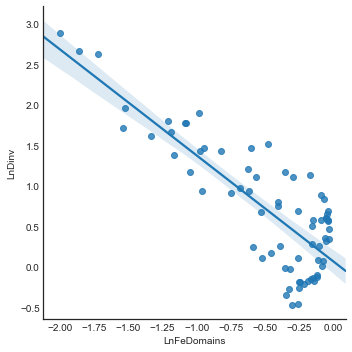

In [6]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df4)
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


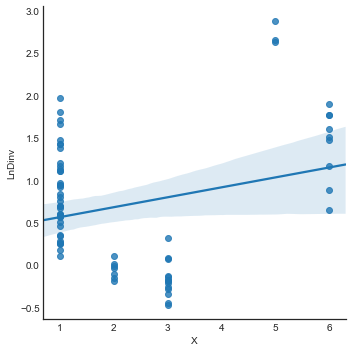

In [7]:
sns.lmplot(x='X', y='LnDinv', data=df4)
plt.show()

In [8]:
# sns.lmplot(x='LnFeDomains', y='X', data=df4)
# plt.show()

# # This plot shows the major problem with these models,
# # we can see that the various systems do not have data point distributed equally
# # but we see concentrations of systems in some small potion of FeDomain values.

In [9]:
est = smf.ols('LnDinv ~ LnFeDomains + X*LnFeDomains', df4).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     50.18
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           3.21e-17
Time:                        01:00:33   Log-Likelihood:                -41.983
No. Observations:                  72   AIC:                             91.97
Df Residuals:                      68   BIC:                             101.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1670      0.135      1.234      0.221      -0.103       0.437
LnFeDomains      -0.9963      0.201     -4.949      0.000      -1.398      -0.595
X                -0.0311      0.050     -0.622      0.536      -0.131       0.069
X:LnFeDomains    -0.0954      0.057     -1.671      0.099      -0.209       0.019
==============================================================================
Omnibus:                        4.589   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.520
Skew:                          -0.212   Prob(JB):                        0.284
Kurtosis:                       2.188   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What does this high p-value means ?

### Multiple regression

In [50]:
data3 = pd.ExcelFile('ModifiedData/Cu_sys_oh.xlsx')
print(data3.sheet_names)
df5 = data3.parse('Sheet1')
df5.head(5)

df6 = df5.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df6.dropna()
pd.options.display.max_rows = 999
df6.info()
df6.head(5)

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
x1             72 non-null int64
x2             72 non-null int64
x3             72 non-null int64
x4             72 non-null int64
x5             72 non-null int64
x6             72 non-null int64
dtypes: float64(3), int64(6)
memory usage: 5.1 KB


,Dinv,LnFeDomains,LnDinv,x1,x2,x3,x4,x5,x6
0,2.325581,-0.063935,0.843970,1,0,0,0,0,0
1,3.125000,-0.171537,1.139434,1,0,0,0,0,0
2,3.030303,-0.297457,1.108663,1,0,0,0,0,0
3,3.030303,-0.565593,1.108663,1,0,0,0,0,0
4,4.166667,-0.818951,1.427116,1,0,0,0,0,0


In [52]:
# est1 = smf.ols('LnDinv ~ LnFeDomains + x2', df6).fit()
# regr1 = est1.params
# est2 = smf.ols('LnDinv ~ LnFeDomains + LnFeDomains*X', df6).fit()
# regr2 = est2.params

# print('Regression 1 - without interaction term')
# print(regr1)
# print('\nRegression 2 - with interaction term')
# print(regr2)

In [57]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1*LnFeDomains + x2*LnFeDomains + x3*LnFeDomains + x5*LnFeDomains + x6*LnFeDomains ', df6).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     71.00
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           2.95e-29
Time:                        01:31:25   Log-Likelihood:                 3.3054
No. Observations:                  72   AIC:                             13.39
Df Residuals:                      62   BIC:                             36.16
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4111      0.394      1.

**p-values** are quite high!, check what does it mean.

In [70]:
# feDomains = np.linspace(0,100)

# sulphur = np.linspace(regr1['Intercept']+regr1['x1'],regr1['Intercept']+regr1['x1']+100*regr1['LnFeDomains'])
# phosphorus = np.linspace(regr1['Intercept']+regr1['x2'],regr1['Intercept']+regr1['x2']+100*regr1['LnFeDomains'])
# carbon = np.linspace(regr1['Intercept']+regr1['x3'],regr1['Intercept']+regr1['x3']+100*regr1['LnFeDomains'])
# SC = np.linspace(regr1['Intercept']+regr1['x5'],regr1['Intercept']+regr1['x5']+100*regr1['LnFeDomains'])
# SP = np.linspace(regr1['Intercept']+regr1['x6'],regr1['Intercept']+regr1['x6']+100*regr1['LnFeDomains'])

# plt.plot(feDomains, sulphur)
# plt.plot(feDomains, SP)
# plt.plot(feDomains, SC)
# plt.show()

# # # Create plot
# # fig, (ax1,ax2,ax3,ax5,ax6) = plt.subplots(5,1, figsize=(12,12))
# # ax1.plot(feDomains, sulphur, 'b')
# # ax2.plot(feDomains, phosphorus, 'p')
# # ax3.plot(feDomains, carbon, 'y')
# # ax5.plot(feDomains, SC, 'g')
# # ax6.plot(feDomains, SP, 'r')

# # for ax in fig.axes:
# #     ax.legend(['System'], loc=2)
# #     ax.set_xlabel('LnFeDomains')
# #     ax.set_ylabel('LnDinv')
# #     ax.set_ylim(ymax=10)

Some error in the above code

In [ ]:
# ## Interaction between Quantitative and Qualitative terms


# est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
# regr1 = est1.params
# est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
# regr2 = est2.params

# print('Regression 1 - without interaction term')
# print(regr1)
# print('\nRegression 2 - with interaction term')
# print(regr2)


# # Income (x-axis)
# income = np.linspace(0,150)

# # Balance without interaction term (y-axis)
# student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
#                        regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
# non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# # Balance with iteraction term (y-axis)
# student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
#                        regr2['Intercept']+regr2['Student2']+
#                        150*(regr2['Income']+regr2['Income:Student2']))
# non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# # Create plot
# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
# ax1.plot(income, student1, 'r', income, non_student1, 'k')
# ax2.plot(income, student2, 'r', income, non_student2, 'k')

# for ax in fig.axes:
#     ax.legend(['student', 'non-student'], loc=2)
#     ax.set_xlabel('Income')
#     ax.set_ylabel('Balance')
#     ax.set_ylim(ymax=1550)